# Comparison of CSV Files

This notebook compares data from `events_output_50gev.csv` and `first_emission_50gev.csv`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the CSV files
csv_a = pd.read_csv('events_output_50gev.csv')
csv_b = pd.read_csv('first_emission_50gev.csv')

print(f"csv_a shape: {csv_a.shape}")
print(f"csv_b shape: {csv_b.shape}")
print(f"\ncsv_a columns: {csv_a.columns.tolist()}")
print(f"csv_b columns: {csv_b.columns.tolist()}")

csv_a shape: (9909, 7)
csv_b shape: (10000, 8)

csv_a columns: ['Event', 'Particle', 'Particle_pz', 'Particle_pT', 'Particle_px', 'Particle_py', 'Particle_E']
csv_b columns: ['Event', 'Name', 'Pid', 'Particle_px', 'Particle_py', 'Particle_pz', 'Particle_E', 'Particle_pT']


In [3]:
# Display first few rows
print("First few rows of csv_a:")
print(csv_a.head())
print("\nFirst few rows of csv_b:")
print(csv_b.head())

First few rows of csv_a:
   Event Particle  Particle_pz  Particle_pT  Particle_px  Particle_py  \
0      0      pi0     36.98050     0.285588     0.160985     0.235890   
1      1      pi-     20.44580     0.702481     0.687438     0.144598   
2      2      pi0     27.04950     0.755078    -0.738118     0.159136   
3      3      pi+     17.65490     0.364516    -0.324220     0.166592   
4      4      pi0      6.21728     0.284134    -0.106057    -0.263598   

   Particle_E  
0    36.98180  
1    20.45830  
2    27.06040  
3    17.65920  
4     6.22523  

First few rows of csv_b:
   Event Name  Pid  Particle_px  Particle_py  Particle_pz  Particle_E  \
0      0  pi0  111     0.160985     0.235890    36.980500   36.981800   
1      1  pi0  111     0.236153     0.365678    22.802300   22.806800   
2      2  pi- -211     0.072274     0.046684     0.632455    0.653362   
3      3  pi- -211     0.036291     0.250416    41.818200   41.819200   
4      4  pi0  111    -0.149215     0.046229     

## Plot 1 & 2: Comparison of pz and pT Values

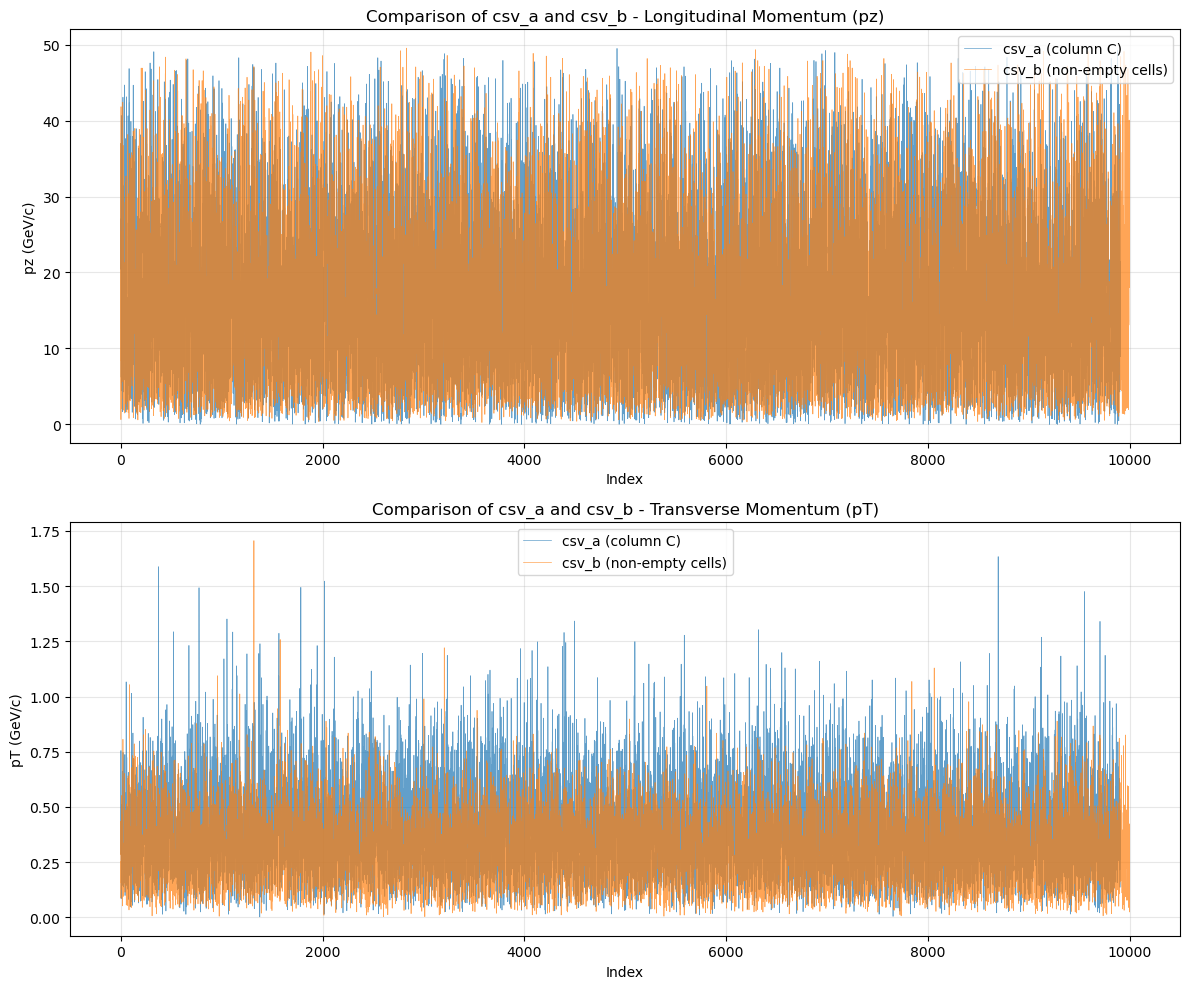

In [8]:
# Extract pz and pT columns
csv_a_pz = csv_a['Particle_pz'].values
csv_b_pz = csv_b['Particle_pz'].dropna().values

csv_a_pT = csv_a['Particle_pT'].values
csv_b_pT = csv_b['Particle_pT'].dropna().values

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot 1: pz comparison
ax1.plot(csv_a_pz, label='csv_a (column C)', alpha=0.7, linewidth=0.5)
ax1.plot(csv_b_pz, label='csv_b (non-empty cells)', alpha=0.7, linewidth=0.5)
ax1.set_xlabel('Index')
ax1.set_ylabel('pz (GeV/c)')
ax1.set_title('Comparison of csv_a and csv_b - Longitudinal Momentum (pz)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: pT comparison
ax2.plot(csv_a_pT, label='csv_a (column C)', alpha=0.7, linewidth=0.5)
ax2.plot(csv_b_pT, label='csv_b (non-empty cells)', alpha=0.7, linewidth=0.5)
ax2.set_xlabel('Index')
ax2.set_ylabel('pT (GeV/c)')
ax2.set_title('Comparison of csv_a and csv_b - Transverse Momentum (pT)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Plot 3 & 4: Histograms (Different Scales)

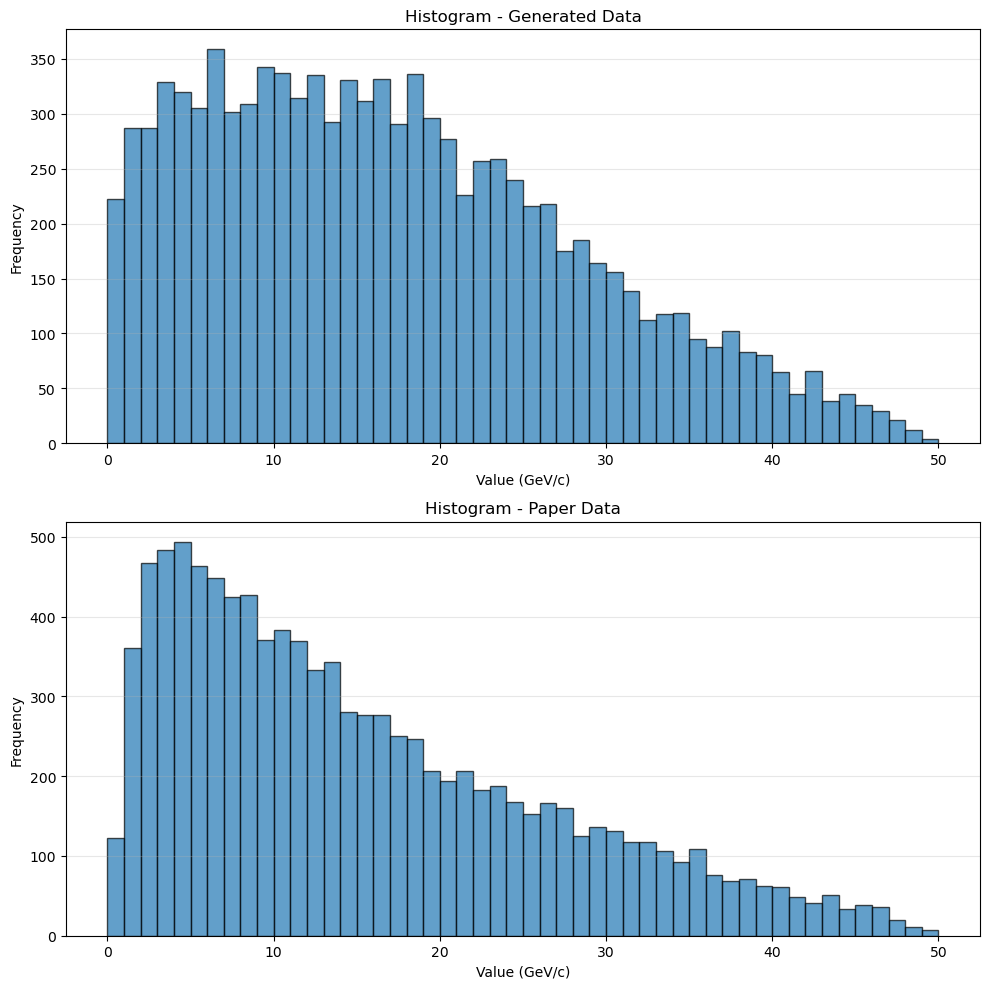

csv_a energy - Mean: 17.285, Std: 11.134
csv_b energy - Mean: 15.355, Std: 11.193


In [ ]:
# Extract energy column for histograms
csv_a_energy = csv_a['Particle_E'].values
csv_b_energy = csv_b['Particle_E'].dropna().values

# Create figure with histograms - Full scale (0-50 GeV/c)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Histogram 1: Generated Data (csv_a)
ax1.hist(csv_a_energy, bins=50, range=(0, 50), alpha=0.7, edgecolor='black')
ax1.set_xlabel('Value (GeV/c)')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram - Arjun\'s Data')
ax1.grid(True, alpha=0.3, axis='y')

# Histogram 2: Paper Data (csv_b)
ax2.hist(csv_b_energy, bins=50, range=(0, 50), alpha=0.7, edgecolor='black')
ax2.set_xlabel('Value (GeV/c)')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram - Jinghons\'s Data')
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"csv_a energy - Mean: {csv_a_energy.mean():.3f}, Std: {csv_a_energy.std():.3f}")
print(f"csv_b energy - Mean: {csv_b_energy.mean():.3f}, Std: {csv_b_energy.std():.3f}")

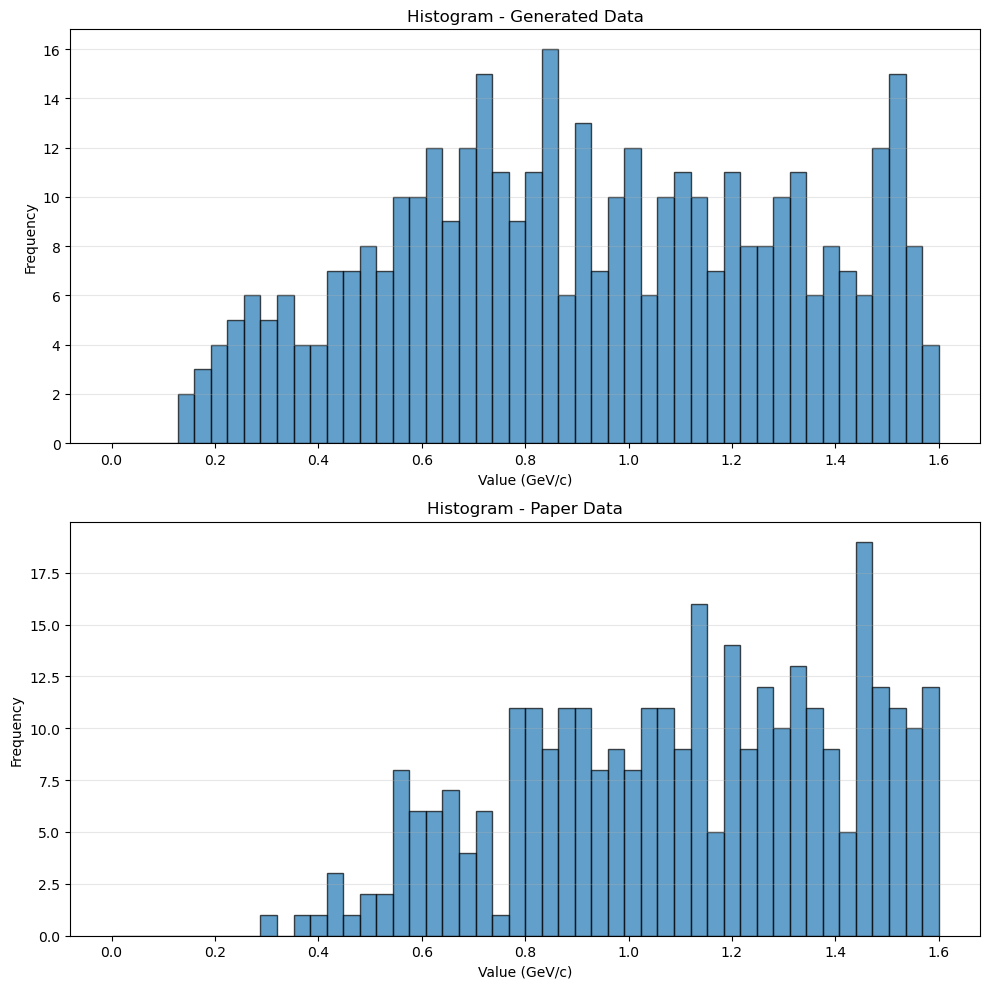

In [ ]:
# Create figure with histograms - Zoomed scale (0-1.6 GeV/c)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Histogram 1: Generated Data (csv_a) - Zoomed
ax1.hist(csv_a_energy, bins=50, range=(0, 1.6), alpha=0.7, edgecolor='black')
ax1.set_xlabel('Value (GeV/c)')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram - Generated Data')
ax1.grid(True, alpha=0.3, axis='y')

# Histogram 2: Paper Data (csv_b) - Zoomed
ax2.hist(csv_b_energy, bins=50, range=(0, 1.6), alpha=0.7, edgecolor='black')
ax2.set_xlabel('Value (GeV/c)')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram - Jinghong\'s Data')
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## Summary Statistics

In [7]:
# Summary statistics
print("CSV A (events_output_50gev.csv) Statistics:")
print(csv_a['Particle_E'].describe())
print("\nCSV B (first_emission_50gev.csv) Statistics:")
print(csv_b['Particle_E'].describe())

CSV A (events_output_50gev.csv) Statistics:
count    9909.000000
mean       17.284876
std        11.134801
min         0.145682
25%         8.192540
50%        15.895300
75%        24.690300
max        49.487100
Name: Particle_E, dtype: float64

CSV B (first_emission_50gev.csv) Statistics:
count    10000.000000
mean        15.354775
std         11.193741
min          0.292079
25%          6.238235
50%         12.562050
75%         22.363250
max         49.526800
Name: Particle_E, dtype: float64
